<a href="https://colab.research.google.com/github/tyriksheyh4567/Healthy-Feet-Bot/blob/main/github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!apt install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,271 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1.1 [1,271 kB]
Fetched 1,271 kB in 1s (1,790 kB/s)
Selecting previously unselected package tesseract-ocr-rus.
(Reading database ... 126371 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-rus_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-rus (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-rus (1:4.00~git30-7274cfa-1.1) ...


In [13]:
!pip install -U pytesseract

Введите АБСОЛЮТНЫЙ путь:

/content/okak.jpg


Extracted Text:

ПРОДУКТ ДЕТСКОГО ПИТАНИЯ ДЛЯ ДЕТЕЙ РАННЕГО
ВОЗРАСТА. ПРОДУКТ ПРИКОРМА,
ПЮРЕ ОВОЩНОЕ НЕК «КАБАЧКИ»

ГОМОГЕНИЗИРОВАННОЕ, СТЕРИЛИЗОВАННОЕ.
ДЛЯ ДЕТЕЙ СТАРШЕ 4 МЕСЯЦЕВ.

(СОСТАВ: ПЮРЕ ИЗ КАБАЧКА, ВОДА, МУКА РИСОВАЯ. ПИЩЕВАЯ ЦЕННОСТЬ
(СРЕДНИЕ ЗНАЧЕНИЯ) НА 100 Г ПРОДУКТА: ЭНЕРГЕТИЧЕСКАЯ ЦЕННОСТЬ
(КАЛОРИЙНОСТЬ) - 115/25 КДЖККАЛ; БЕЛКИ - 0,9 Г; ЖИРЫ - 0.2 Г;
УГЛЕВОДЫ - 5.1 Г; ПИЩЕВЫЕ ВОЛОКНА - 0,8 Г; КАЛИЙ - 160 МГ
УПОТРЕБЛЕНИЕ: ПРОДУКТ ГОТОВ К УПОТРЕБЛЕНИЮ. ВВЕДЕНИЕ НОВОГО
ПРОДУКТА НАЧИНАЙТЕ С 1 ЧАЙНОЙ ЛОЖКИ, ПОСТЕПЕННО ДОВОДЯ ПОРЦИЮ
ДО ВОЗРАСТНОЙ НОРМЫ. ВНИМАНИЕ! ВВОДЯ В РАЦИОН РЕБЕНКА С
АЛЛЕРГИЕЙ НОВЫЙ ПРОДУКТ, УБЕДИТЕСЬ, ЧТО ВАШ МАЛЬШ ПЕРЕНОСИТ BCE
ГО СОСТАВЛЯЮЩИЕ. ПЕРЕД УПОТРЕБЛЕНИЕМ ПЕРЕМЕЩАТЬ И ПОДОГРЕТЬ,
НЕОБХОДИМОЕ КОЛИЧЕСТВО. НЕ ИСПОЛЬЗОВАТЬ ПОВТОРНО ОСТАТКИ
РАЗОГРЕТОГО ПЮРЕ. НЕ ИСПОЛЬЗУЙТЕ ПРОДУКТ, ЕСЛИ ПРИ ОТКРЫТИИ
КРЫШКИ НЕБЫЛО ЩЕЛЧКА. ХРАНЕНИЕ: ХРАНИТЬ ПРИ ТЕМПЕРАТУРЕ ОТ +2
ДО +25°СИ ОТНОСИТЕЛЬНОЙ ВЛАЖНОСТИ ВОЗДУХА НЕ БОЛЕЕ 75%, ПОСЛЕ
ВСКРЫТИЯ ХРАНИТЬ В ХОЛОДИЛЬНИКЕ ПРИ ТЕМПЕРАТУР

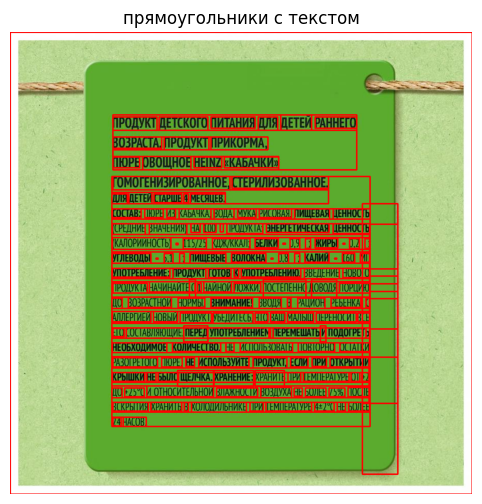

In [10]:
from google.colab.patches import *
import cv2
import pytesseract
from matplotlib import pyplot as plt
from rich.console import Console
import sys

console = Console()
path = console.input("Введите [bold]АБСОЛЮТНЫЙ[/bold] путь:")

img = cv2.imread(path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

extracted_text = pytesseract.image_to_string(image_rgb, lang='eng+rus')
extracted_text = extracted_text.strip()
console.print("[bold]Extracted Text:[/bold]")
print(extracted_text)

data = pytesseract.image_to_data(image_rgb, output_type=pytesseract.Output.DICT)

n_boxes = len(data['level'])
for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("прямоугольники с текстом")
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pytesseract
from PIL import Image
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

nltk.download('popular')

hdhj = stopwords.fileids()

def extract_text_from_image(image_path):
    try:
        text = pytesseract.image_to_string(Image.open(image_path), lang='eng+rus+kz')
        return text.strip()
    except Exception as e:
        print(f"Ошибка при извлечении текста: {e}")
        return None

def classify_text(text):
    train_data = [
        ("вода, сахар, лимонная кислота", "состав"),
        ("освежающий напиток с лимоном", "описание"),
        ("мука, яйца, молоко", "состав"),
        ("вкусный торт", "описание")
    ]

    train_texts = [item[0] for item in train_data]
    train_labels = [item[1] for item in train_data]

    vectorizer = TfidfVectorizer(stop_words=hdhj)
    train_vectors = vectorizer.fit_transform(train_texts)
    test_vector = vectorizer.transform([text])

    classifier = MultinomialNB()
    classifier.fit(train_vectors, train_labels)

    return classifier.predict(test_vector)[0]

def process_image(image_path):
    extracted_text = extract_text_from_image(image_path)
    if extracted_text:
        classification = classify_text(extracted_text)
        print(f"Текст: {extracted_text}")
    else:
        print("Не удалось извлечь текст из изображения.")

image_path = "/content/3-1.jpg"
process_image(image_path)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Текст: Готово к употреблению.
© Начните кормление с 1/2 чайнойлонни, © ВАЖНО: не помещайте/не оставляйте
постепенно увеличивая объем. крышечку взоне доступа детей младше
Odie разогревайте упаковку в Эб месяцев. Если упаковка вскрыта или
_ ОО о никроволновой печи. B3\yTa, He используйте продукт.
Идеальной пищей для грудного Е является молоко матери. В03 рекомендует исключительно пд вскармливание
впервые шесть месяцев и посл душе введение Apap при продолжении трио вакармливания, Компания Нестле
поддерживает данную рекомендацию. Продолжайте грудное вскармливание как Можно дольше после введения прикорма.

Пищевая ценность/ злество ПРОДУ, Звоните и пишите

Tarawa куздыльны: м И

белки/Акуыз O4r de 880020020 55 3aon по России
Mupoi/Mai Otr > {5} 1000805544 Звонки по Казахстану
Углеводы Кемер т >) - ин 7 Звонки по Беларуми

Калий/Калий 150 мг < ммн.лезНевау. пи
Энергетическая ценность] 211 Дж/
wey

ргетикалык кундыльюы 50 ккал

   
    

    

  

 
       
   
   
  

    
   
  
 
       

